# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis of data
1a)Temperature gets warmer as cities get closer to equator. 
1b)Southern hemisphere is hotter now (~65deg on average,) than northern (~20deg on average) because its summertime.
1c)There is a much wider range of max Temp for cities of the same latitude on the northern hemisphere versus the south. This is likely due to the fact that there are much greater interior land masses north of the equator and so probably if we dug deeper we would find that cities closer to the coast stay warmer than cities inland at this time of year. Also the fact that there is less land mass in the southern hemisphere will give a smaller range of temperatures because only a few populous cities can be far from the coast.

2)No obvious relationship between Latutide and either humidity or cloudiness.
3)Latitude v Windspeed has a slight bowl shape because of a significant number of cities at either extreme of latitude have  high average windspeed. 



In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

now = datetime.datetime.now()

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

## Generate Cities List

In [4]:
# Initialize Arrays to be used.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations and store into an lat_lngs array
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # Find nearest city name and country code and save into city variable as string.
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name + ',' + citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create a dataframe to add all the data from the API calls.
column_names = ["City", "Country","Latitude","Longitude","Temperature (F)","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
cities_df = pd.DataFrame(columns=column_names)

# URL to use for openweather API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Initialize dataframe index.
index = 0

print ("Retrieving weather data:")
# Loop through the list of cities and add the data to the df.
for city in cities: 
    # Build the URL to access the API with parameters.
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city.replace(" ","+")
  
    # Use requests library get function to fetch URL data in JSON format.
    city_data = requests.get(target_url).json()
    # if the city code is invalid, skip
    if city_data["cod"] == "404":
        print("Location not found, skipping...")
    else:
        # take JSON data and store into dataframe locations.
        cities_df.loc[index, "City"] = city_data["name"]
        cities_df.loc[index, "Country"] = city_data["sys"]["country"]
        cities_df.loc[index, "Latitude"] = city_data["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = city_data["coord"]["lon"]
        cities_df.loc[index, "Temperature (F)"] = city_data["main"]["temp"]
        cities_df.loc[index, "Humidity (%)"] = city_data["main"]["humidity"]
        cities_df.loc[index, "Cloudiness (%)"] = city_data["clouds"]["all"]
        cities_df.loc[index, "Wind Speed (mph)"] = city_data["wind"]["speed"]
        
        # print information showing the data retrieval is processing.
        print("------------------------")
        print("Proceesing: City # " , index+1, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        # increment index for df
        index += 1

Retrieving weather data:
------------------------
Proceesing: City #  1  |  Barinas VE
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=barinas,ve
------------------------
Proceesing: City #  2  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=vila+franca+do+campo,pt
------------------------
Proceesing: City #  3  |  Dunedin NZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=dunedin,nz
------------------------
Proceesing: City #  4  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=hermanus,za
------------------------
Proceesing: City #  5  |  Bambous Virieux MU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=bambous+virieux,mu
------------------------
Proceesing: City #  6  |  

------------------------
Proceesing: City #  45  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=cape+town,za
Location not found, skipping...
Location not found, skipping...
------------------------
Proceesing: City #  46  |  Chernyshevskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=chernyshevskiy,ru
------------------------
Proceesing: City #  47  |  Narsaq GL
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=narsaq,gl
------------------------
Proceesing: City #  48  |  Hithadhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=hithadhoo,mv
------------------------
Proceesing: City #  49  |  Hobart AU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=hobart,au
------------------------
Proceesi

------------------------
Proceesing: City #  90  |  Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=cherskiy,ru
------------------------
Proceesing: City #  91  |  Hasaki JP
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=hasaki,jp
Location not found, skipping...
------------------------
Proceesing: City #  92  |  Tecoanapa MX
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=tecoanapa,mx
------------------------
Proceesing: City #  93  |  Can TR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=can,tr
------------------------
Proceesing: City #  94  |  Chuy UY
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=chuy,uy
------------------------
Proceesing: City #  95  |  Russell NZ
http://api.openweathermap.org/

------------------------
Proceesing: City #  136  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=severo-kurilsk,ru
------------------------
Proceesing: City #  137  |  Elizabeth City US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=elizabeth+city,us
------------------------
Proceesing: City #  138  |  Hearst CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=hearst,ca
------------------------
Proceesing: City #  139  |  Kavieng PG
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kavieng,pg
Location not found, skipping...
------------------------
Proceesing: City #  140  |  Northam GB
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=northam,gb
------------------------
Proceesing: City #  141  | 

------------------------
Proceesing: City #  180  |  Cidreira BR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=cidreira,br
------------------------
Proceesing: City #  181  |  Prince Rupert CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=prince+rupert,ca
------------------------
Proceesing: City #  182  |  Nouadhibou MR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=nouadhibou,mr
Location not found, skipping...
------------------------
Proceesing: City #  183  |  Narsingi IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=narsingi,in
------------------------
Proceesing: City #  184  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=atuona,pf
Location not found, skipping...
------------------------
P

Location not found, skipping...
------------------------
Proceesing: City #  226  |  Dindori IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=dindori,in
Location not found, skipping...
------------------------
Proceesing: City #  227  |  Oranjemund NA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=oranjemund,na
------------------------
Proceesing: City #  228  |  Ndele CF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ndele,cf
------------------------
Proceesing: City #  229  |  Jenks US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=jenks,us
------------------------
Proceesing: City #  230  |  Cayenne GF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=cayenne,gf
------------------------
Proceesing: City #  231

------------------------
Proceesing: City #  271  |  Chapais CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=chapais,ca
------------------------
Proceesing: City #  272  |  Mauganj IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=mauganj,in
------------------------
Proceesing: City #  273  |  Kamenskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kamenskiy,ru
------------------------
Proceesing: City #  274  |  Dodge City US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=dodge+city,us
------------------------
Proceesing: City #  275  |  Muravlenko RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=muravlenko,ru
------------------------
Proceesing: City #  276  |  Merritt Island US
http://api.openweatherm

------------------------
Proceesing: City #  315  |  Okitipupa NG
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=okitipupa,ng
------------------------
Proceesing: City #  316  |  Acajutla SV
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=acajutla,sv
------------------------
Proceesing: City #  317  |  Tuatapere NZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=tuatapere,nz
Location not found, skipping...
------------------------
Proceesing: City #  318  |  College US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=college,us
------------------------
Proceesing: City #  319  |  Bani Walid LY
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=bani+walid,ly
------------------------
Proceesing: City #  320  |  Umm Lajj 

------------------------
Proceesing: City #  359  |  Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=bandarbeyla,so
------------------------
Proceesing: City #  360  |  Cassilandia BR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=cassilandia,br
------------------------
Proceesing: City #  361  |  Opuwo NA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=opuwo,na
------------------------
Proceesing: City #  362  |  Kalaleh IR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kalaleh,ir
------------------------
Proceesing: City #  363  |  Ngunguru NZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ngunguru,nz
------------------------
Proceesing: City #  364  |  Kudat MY
http://api.openweathermap.org/data

------------------------
Proceesing: City #  404  |  Benguela AO
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=benguela,ao
------------------------
Proceesing: City #  405  |  Vysokogornyy RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=vysokogornyy,ru
------------------------
Proceesing: City #  406  |  Dwarka IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=dwarka,in
------------------------
Proceesing: City #  407  |  Impfondo CG
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=impfondo,cg
------------------------
Proceesing: City #  408  |  Sarahan IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=sarahan,in
------------------------
Proceesing: City #  409  |  Okoneshnikovo RU
http://api.openweathermap.or

------------------------
Proceesing: City #  448  |  Trat TH
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=trat,th
------------------------
Proceesing: City #  449  |  Nhulunbuy AU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=nhulunbuy,au
Location not found, skipping...
------------------------
Proceesing: City #  450  |  Veraval IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=veraval,in
------------------------
Proceesing: City #  451  |  Mongoumba CF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=mongoumba,cf
------------------------
Proceesing: City #  452  |  Kabo CF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kabo,cf
------------------------
Proceesing: City #  453  |  Dire Dawa ET
http://api.openw

------------------------
Proceesing: City #  493  |  Pacific Grove US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=pacific+grove,us
------------------------
Proceesing: City #  494  |  Townsville AU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=townsville,au
------------------------
Proceesing: City #  495  |  Flinders AU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=flinders,au
Location not found, skipping...
------------------------
Proceesing: City #  496  |  Vikhorevka RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=vikhorevka,ru
------------------------
Proceesing: City #  497  |  Muscat OM
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=muscat,om
------------------------
Proceesing: City #  498  |  B

------------------------
Proceesing: City #  539  |  Ercis TR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ercis,tr
------------------------
Proceesing: City #  540  |  Novopavlovka RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=novopavlovka,ru
------------------------
Proceesing: City #  541  |  Kenai US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kenai,us
------------------------
Proceesing: City #  542  |  Abu Kamal SY
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=abu+kamal,sy
------------------------
Proceesing: City #  543  |  Rio Cuarto AR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=rio+cuarto,ar
------------------------
Proceesing: City #  544  |  Kutum SD
http://api.openweathermap.org/data/2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# export city data to csv file
cities_df.to_csv("cities_data.csv")
# display df
cities_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Barinas,VE,8.64,-70.23,94.36,42,0,6.53
1,Vila Franca do Campo,PT,37.72,-25.43,57.09,62,75,10.29
2,Dunedin,NZ,-45.87,170.5,64,73,0,11.01
3,Hermanus,ZA,-34.42,19.24,64,82,0,1.01
4,Bambous Virieux,MU,-20.34,57.76,80.24,83,40,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

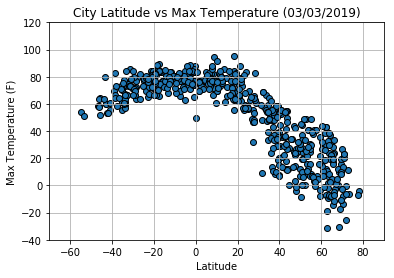

In [10]:
# Create scatter plot using latitude and temperature.
plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature (F)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

# Provide Title and lables to graph
plt.title(f"City Latitude vs Max Temperature ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
# Add grid lines
plt.grid(True)
# Define range the data will lie within
plt.xlim([-70, 90])
plt.ylim([-40, 120])

# Save Figure
plt.savefig("latitude_temp.png")
plt.show()


#### Latitude vs. Humidity Plot

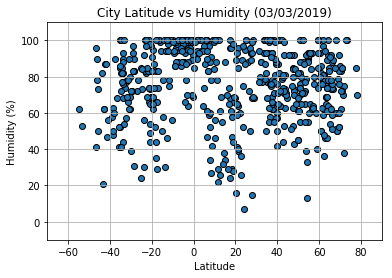

In [11]:
# Create scatter plot using latitude and humidity.
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

# Provide Title and lables to graph
plt.title(f"City Latitude vs Humidity ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
# Add grid lines
plt.grid(True)
# Define range the data will lie within
plt.xlim([-70, 90])
plt.ylim([-10, 110])

# Save Figure
plt.savefig("latitude_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

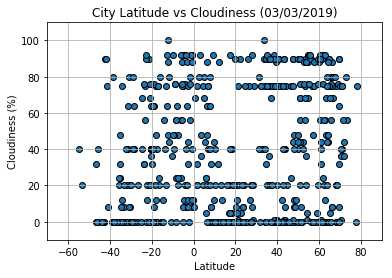

In [12]:
# Create scatter plot using latitude and cloudiness.
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

# Provide Title and lables to graph
plt.title(f"City Latitude vs Cloudiness ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
# Add grid lines
plt.grid(True)
# Define range the data will lie within
plt.xlim([-70, 90])
plt.ylim([-10, 110])

# Save Figure
plt.savefig("latitude_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

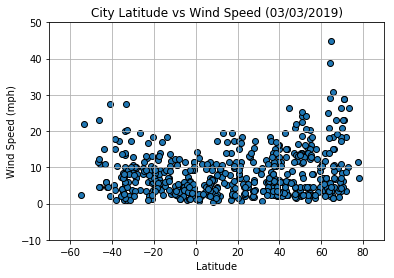

In [13]:
# Create scatter plot using latitude and wind_speed.
plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

# Provide Title and lables to graph
plt.title(f"City Latitude vs Wind Speed ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# Add grid lines
plt.grid(True)
# Define range the data will lie within
plt.xlim([-70, 90])
plt.ylim([-10, 50])

# Save Figure
plt.savefig("latiutde_windspeed.png")
plt.show()